# Pathfinding

In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("C:/git/westworld")

import westworld

# Pathfinding in a numpy array maze

## Applying A* to a numpy array problem

In [3]:
from westworld.algorithms.pathfinding.astar import AStar

In [4]:
astar = AStar()

In [5]:
maze = np.array([
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
)

start = (0, 0)
end = (7, 6)

##### Finding the shortest path

In [6]:
path = astar.run(maze,start,end)
path

[(0, 0),
 (1, 0),
 (1, 1),
 (2, 1),
 (2, 2),
 (3, 2),
 (3, 3),
 (4, 3),
 (5, 3),
 (5, 4),
 (5, 5),
 (6, 5),
 (6, 6),
 (7, 6)]

In [7]:
test = maze.copy()
test[tuple(np.array(path).T)] = 2
test[start] = 3
test[end] = 4
test

array([[3, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [2, 2, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 2, 2, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 2, 2, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 2, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 2, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [8]:
astar.show_path(maze,start,end,path)

| O       #           |
| . .     #           |
|   . .   #           |
|     . . #           |
|       . #           |
|       . . .         |
|         # . .       |
|         #   X       |
|         #           |
|                     |


##### Finding the shortest path with diagonal moves

In [9]:
path = astar.run(maze,start,end,diagonal = True)
path

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 3), (5, 4), (6, 5), (7, 6)]

Visualizing the path

In [10]:
astar.show_path(maze,start,end,path)

| O       #           |
|   .     #           |
|     .   #           |
|       . #           |
|       . #           |
|         .           |
|         # .         |
|         #   X       |
|         #           |
|                     |


## Performance test

A* simple implementation runs in this simple example in half a ms

In [11]:
%%timeit
path = astar.run(maze,start,end)

632 µs ± 33.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Testing on a new maze similar to the environment below

In [12]:
maze2 = np.uint8(np.array([
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

start = (1,1)
end = (1,10)

path = astar.run(maze2,start,end)
path

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 6),
 (3, 6),
 (4, 6),
 (5, 6),
 (6, 6),
 (7, 6),
 (8, 6),
 (8, 7),
 (8, 8),
 (7, 8),
 (6, 8),
 (5, 8),
 (5, 9),
 (5, 10),
 (4, 10),
 (3, 10),
 (2, 10),
 (1, 10)]

In [13]:
astar.show_path(maze2,start,end,path)

|               #               |
|   O . . . . . #     X         |
|             . #     .         |
|   #         . #     . #       |
|             . # # # . #       |
|             . # . . .         |
|             . # .             |
|             . # .             |
|             . . .             |
|                               |


## Debugging and adding early stopping

In [14]:
maze3 = np.uint8(np.array([
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
]))
maze3

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [15]:
start = (0,0)
end = (0,3)

path = astar.run(maze3,start,end,n = 15)
astar.show_path(maze3,start,end,path)

| O . # X   |
|   . # . . |
|   . . # . |
|     . . . |
|           |


C:/git/westworld\westworld\algorithms\pathfinding\astar.py:108: UserWarning: Giving up on pathfinding too many iterations
  warnings.warn("Giving up on pathfinding too many iterations")


# Pathfinding in westworld environment

## Pathfinding in toy environment

### Simple configuration

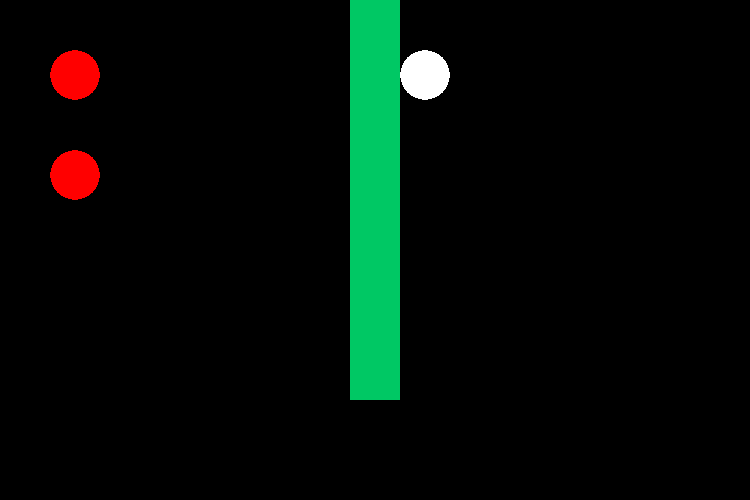

In [30]:
from westworld.environment.grid import GridEnvironment
from westworld.agents.grid import BaseAgent,BaseObstacle,BaseTrigger
from westworld.simulation.simulation import Simulation
import pygame

BOX_SIZE = 50

class Agent(BaseAgent):
    def step(self):
        self.move_towards(obj = triggers[0])

agents = [Agent(1,1,1,1,circle = True),Agent(1,3,1,1,circle = True)]
obstacles = [BaseObstacle(7,0,1,8,(0,200,100))]
triggers = [BaseTrigger(8,1,1,1,(255,255,255),circle = True)]


# Setup grid
env = GridEnvironment(BOX_SIZE,15,10,objects = agents + obstacles + triggers)
env.render()
env.get_img()

### Pathfinding

In [31]:
agents[0].step()

In [32]:
env.render()

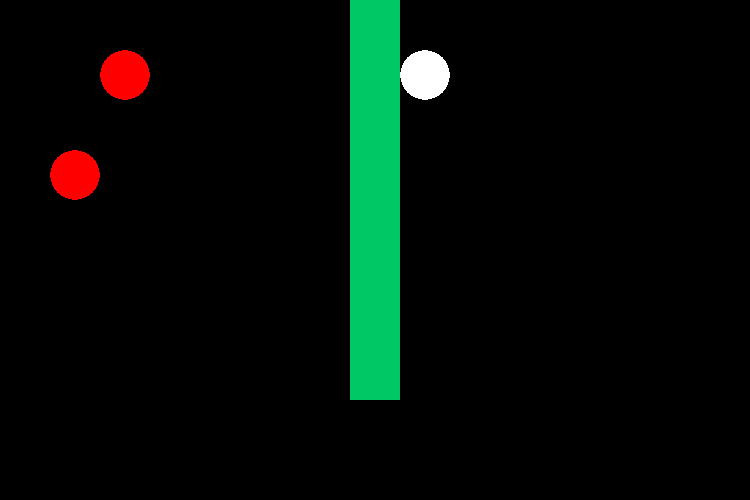

In [33]:
env.get_img()

How does it work ?

The code extracts a navigation mesh

In [34]:
mesh = env.get_navigation_mesh(agents[0])
mesh

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Then run the A* algorithm as shown above

In [35]:
from westworld.algorithms.pathfinding.astar import AStar
astar = AStar()

In [36]:
start = (1,1)
end = (1,8)
path = astar.run(mesh,start,end)
path

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 6),
 (3, 6),
 (4, 6),
 (5, 6),
 (6, 6),
 (7, 6),
 (8, 6),
 (8, 7),
 (8, 8),
 (7, 8),
 (6, 8),
 (5, 8),
 (4, 8),
 (3, 8),
 (2, 8),
 (1, 8)]

In [37]:
astar.show_path(mesh,start,end,path)

|               #               |
|   O . . . . . # X             |
|             . # .             |
|   #         . # .             |
|             . # .             |
|             . # .             |
|             . # .             |
|             . # .             |
|             . . .             |
|                               |


### Running a simulation

In [38]:
sim = Simulation(env)

In [39]:
sim.run_episode(10,save = "toy_pathfinding.gif",replay = True,fps_replay = 3)

[INFO] Saving gif at ./captures/toy_pathfinding.gif



interactive(children=(Play(value=0, description='Press play', interval=333, max=10), Output()), _dom_classes=(…

IntSlider(value=0, max=10)

In [52]:
env.quit()